# Lab 2 Daniel Claesson

Links to material I found useful in this lab:
- [Geeks for Geeks, working with csv files](https://www.geeksforgeeks.org/working-csv-files-python/)
- [Pyhton doc, reading and writing files](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files)
- [Programiz, python list count](https://www.programiz.com/python-programming/methods/list/count)
- [Stackoverflow, sort list based on another list](https://stackoverflow.com/questions/6618515/sorting-list-according-to-corresponding-values-from-a-parallel-list)
- [nkmk.me, How to return multiple values from function](https://note.nkmk.me/en/python-function-return-multiple-values/)


**read_traingdata** funktionen:
- Läser in trainingdatan direkt från .txt-filen, baserat på filepath input
- Gör om strings till floats, tar bort white_spaces etc.
- Returnerar en list of lists: [[width],[height],[label]]

In [1]:
import matplotlib.pyplot as plt
import math

def read_trainingdata(filepath):
    """Returns list of list with width, heigh and label values."""
    with open(filepath, "r") as file:
        content = file.readlines()

    width = []
    height = []
    label = []
    content2 = []

    for item in content:
        content2.append(item.split(','))

    del content2[0]

    for item in content2:
        item[0] = float(item[0])
        item[1] = item[1].strip()
        item[1] = float(item[1])
        item[2] = item[2].strip()
        item[2] = item[2].replace('\n','')
        item[2] = int(item[2])
        width.append(item[0])
        height.append(item[1])
        label.append(item[2])

    returnlist = []
    returnlist.append(width)
    returnlist.append(height)
    returnlist.append(label)

    return returnlist

TD = read_trainingdata("..\Data\datapoints.txt")


**plot_trainingdata** funktionen:
- plottar träningsdatan för varje sample

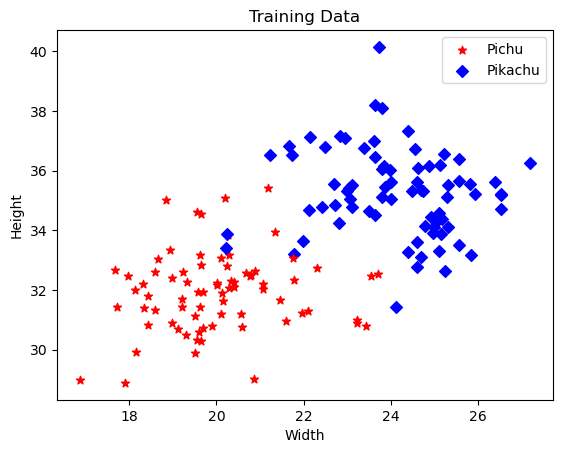

In [35]:
def plot_trainingdata(width, height, label=None):
    """Plots all training data"""
    for idx in range(len(label)):
        if label[idx] == 1:
            plt.scatter(width[idx], height[idx], color = 'blue', marker = "D")
        elif label[idx] == 0:
            plt.scatter(width[idx], height[idx], color = 'red', marker = "*")
        else: break
    
    plt.title('Training Data')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.legend(['Pichu','Pikachu'])


plot_trainingdata(TD[0], TD[1], TD[2])

**read_sampledata* funktionen:
- läser in sample datan från filen

In [56]:
def read_sampledata(filepath):
    """Functions reads the file testpoints.txt,
    extracts the weight and height and stores
    as a list of lists, that can be parsed as arguments
    to the classifier function."""
    with open(filepath, 'r') as file:
        content = file.readlines()
    
    coordinates = []

    for idx in content:
        if '(' and ')' not in idx:
            continue
        else:
            idx_l = idx.find('(')
            idx_m = idx.find(',')
            idx_r = idx.find(')')
            x = float(idx[idx_l+1:idx_m])
            y = float(idx[idx_m+1:idx_r])

            coordinates_list = [x, y]

        coordinates.append(coordinates_list)

    return coordinates

sample_data_coord = read_sampledata('..\Data\\testpoints.txt')
print(sample_data_coord)


[[25.0, 32.0], [24.2, 31.5], [22.0, 34.0], [20.5, 34.0]]


**Classifier** funktionen:
- tar en sample punkts coordinater som inputargument
- beräknar distansen mellan sample punkt och träningsdatans alla punkter
- identifirerar närmsta träningsdata punkt
- klassificerar Pichu / Pikatchu, beroende på närmsta punkts "label"
- Returnerar en sträng med resultatet

In [60]:
def classifier(coordinates):
    """Use nearest neighbour classification to identify
    between Pikachu and Pichu, based on sample data coordinates.
    Coordinates to be given on format [x1, y1], a list."""
    TD_width = TD[0] # x
    TD_height = TD[1] # y
    TD_label = TD[2] # label
    dist = []
    for idx in range(len(TD_label)):
        d = math.sqrt((TD_width[idx] - coordinates[0])**2 + (TD_height[idx] - coordinates[1])**2)
        dist.append(d)
    
    #finding index of the minimum distance, in "dist" list
    idx_min_dist = dist.index(min(dist))

    if TD_label[idx_min_dist] == 0:
        pokemon = "Pichu"
    elif TD_label[idx_min_dist] == 1:
        pokemon = "Pikachu"
   
    return pokemon
        
pokemon = classifier([22.1, 34.1])

print(pokemon)

Pikachu


**classifier10** funktionen baserar analysen på de 10 närmaste grannarna.

In [61]:
def classifier10(coordinates):
    """Use nearest neighbour classification to identify
    between Pikachu and Pichu, based on sample data coordinates.
    Coordinates to be given on format [x1, y1], a list.
    Function uses 10 nearest neighbours for determination."""
    TD_width = TD[0] # x
    TD_height = TD[1] # y
    TD_label = TD[2] # label
    dist = [] #
    for idx in range(len(TD_label)):
        d = math.sqrt((TD_width[idx] - coordinates[0])**2 + (TD_height[idx] - coordinates[1])**2)
        dist.append(d)
    
    # skapar sorterad lista för labels, baserad på dist-listan.
    TD_label_sorted_10 = [x[1] for x in sorted(zip(dist, TD_label))] # https://stackoverflow.com/questions/6618515/sorting-list-according-to-corresponding-values-from-a-parallel-list

    print(f"{TD_label_sorted_10[0:10] = }")
   
    if TD_label_sorted_10[0:10].count(0) > 5:
        pokemon = "Pichu"
    elif TD_label_sorted_10[0:10].count(1) > 5:
        pokemon = "Pikachu"
    else: pokemon = "it's a draw!"
    
    return pokemon
        
pokemon = classifier10([22.1, 34.1])

print(f"The identified Pokemon is {pokemon}.")

TD_label_sorted_10[0:10] = [1, 1, 1, 1, 0, 1, 1, 0, 1, 1]
The identified Pokemon is Pikachu.


**evaluation** funktionen:
- tar lista med flertalet coordinater som inputargument
- för varje koordinat anropas classifier funktionen
- classifier funktionen output används för att skriva ut resultatet

In [59]:
def multi_evaluation(data):
    """Evaluates multiple coordinates, arguments as a list.
    Returns classification for each of the coordinates."""
    res_str=""
    for element in data:
        pokemon = classifier(element)
        res_str = res_str + (f"Sample with (width, heigt): {element[0]}, {element[1]} classified as {pokemon}.\n")
    
    print(res_str)


data = multi_evaluation(sample_data_coord)

Sample with (width, heigt): 25.0, 32.0 classified as Pikachu.
Sample with (width, heigt): 24.2, 31.5 classified as Pikachu.
Sample with (width, heigt): 22.0, 34.0 classified as Pikachu.
Sample with (width, heigt): 20.5, 34.0 classified as Pichu.



Manual user input.
- Here the user is asked to input weight and height of the Pokemon.
- The classifier function is called, with user defines weight and height.
- Error messages are given if the input is not reasonable.

In [36]:
user_width = []
user_heigh = []
allowed_input = {".","0","1","2","3","4","5","6","7","8","9"}

while True:
    width = input("Input Pokemon width(cm): ")
    if not width:
        print("No input was given on width, continue to height.")
        break
    elif not len(width) == len([x for x in width if x in allowed_input]):
        print("Input must be a positive number, it can not be nagative or contain letters, try again.")
        continue
    else:
        user_width = float(width)
        print(f"Given input on width is {width} cm.")
        break

while True:
    height = input("Input Pokemon height(cm): ")
    if not height:
        print("No input on weight and height was given, closing program.")
        break
    elif not len(height) == len([x for x in height if x in allowed_input]):
        print("Input must be a positive number, it can not be nagative or contain letters, try again.")
        continue
    else:
        user_height = float(height)
        print(f"Given input on height is {height} cm.")
        break

user_call = []
user_call.append(user_width)
user_call.append(user_height)

user_result = classifier(user_call)
print(f"The Pokemon classification is {user_result}, with width = {user_width} cm and height = {user_height} cm")


Given input on width is 26 cm.
Given input on height is 36 cm.
The Pokemon classification is Pikachu, with width = 26.0 cm and height = 36.0 cm


In [20]:
# försökte med cvs modulen, men det är ju en textfil.... Överger denna approachen tills vidare.
import csv
fields = []
rows = []
column = []

with open("..\Data\datapoints.csv") as csvfile:
    content = csv.reader(csvfile)
    fields = next(content)
    for row in content:
        rows.append(row)
    #print("total nbr of rows: "%(content.line_num))
    for column in content:
        column.append(column)